In [1]:
from __future__ import unicode_literals
#import ffmpeg
import youtube_dl
import librosa
#from pydub import AudioSegment
import os
from os import path, listdir 
from os.path import isfile, join
import IPython.display as ipd
import matplotlib.pyplot as plt
import librosa.display
import time
import warnings; warnings.simplefilter('ignore')

In [30]:
def clean_name(song_name):
    to_clean = [" (Audio Oficial)", " (Videoclip Oficial)", " , letra", " Letra", " (oficial audio)", " (Audio)", " LETRA", " (Letra)", " (Lyric Video)", " (Lyric Video Oficial)", ]
    for delete_part in to_clean:
        song_name = song_name.replace(delete_part, "")
    return song_name

In [33]:
def clean_all_directories():
    directories = [i for i in listdir("music/") if not i.startswith(".")]
    for type_music in directories:
        for song in listdir(f"music/{type_music}"):
            if song != "song_list" and not song.startswith("."):
                os.remove(f"music/{type_music}/{song}")

In [37]:
#clean_all_directories()

## Correccion de los nombres de las canciones
A continuacion vamos a comprobar el nombre de las canciones que se van a descargar y vamos a introducir las partes del nombre que queremos borrar a la lista `to_clean` de la funcion `clean_name`. Asi, el nombre de las canciones será el correcto

In [38]:
directories = [i for i in listdir("music/") if not i.startswith(".")]
for type_music in directories:
    f = open(f"music/{type_music}/song_list", "r")
    for song in f.readlines():
        video_info = youtube_dl.YoutubeDL().extract_info(url = song,download=False)
        print(f"{clean_name(video_info['title']) =}")

[youtube] cClXPzKkXFs: Downloading webpage
clean_name(video_info['title']) ='La Boca Junta - Melendi, Mau Y Ricky'
[youtube] lkLOtTaRRp4: Downloading webpage
clean_name(video_info['title']) ='Antonio Orozco - Entre Sobras Y Sobras Me Faltas'
[youtube] Un_olGqxmR8: Downloading webpage
clean_name(video_info['title']) ='Beret, Melendi - Desde cero'
[youtube] YrhVydcEDLY: Downloading webpage
clean_name(video_info['title']) ='Marlon - Bajé de la Luna ft. Dani Martín'
[youtube] lGVFzjxkDkQ: Downloading webpage


KeyboardInterrupt: 

In [45]:
directories = [i for i in listdir("music/") if not i.startswith(".")]
for type_music in directories:
    f = open(f"music/{type_music}/song_list", "r")
    for song in f.readlines():
        video_info = youtube_dl.YoutubeDL().extract_info(url = song,download=False)
        video_info['title'] = clean_name(video_info['title'])
        if not os.path.exists(f'music/{type_music}/{video_info["title"]}.mp3'):
            filename = f"music/{type_music}/{video_info['title']}.mp3"
            options={
                'format':'bestaudio/best',
                'keepvideo':False,
                'outtmpl':filename,
            }

            with youtube_dl.YoutubeDL(options) as ydl:
                ydl.download([video_info['webpage_url']])

            print("Download complete... {}".format(filename))
        time.sleep(15)

[youtube] cClXPzKkXFs: Downloading webpage
[youtube] lkLOtTaRRp4: Downloading webpage
[youtube] Un_olGqxmR8: Downloading webpage
[youtube] YrhVydcEDLY: Downloading webpage
[youtube] lGVFzjxkDkQ: Downloading webpage
[youtube] xOgFU26r0QI: Downloading webpage
[youtube] AAvGu9zFX5A: Downloading webpage
[youtube] zGnfnkkPbwg: Downloading webpage
[youtube] oHfoRt8rvfY: Downloading webpage
[youtube] qC_vCoMSUkw: Downloading webpage
[youtube] YHfRcuSdn0g: Downloading webpage
[youtube] jEyfG6c1q_c: Downloading webpage
[youtube] ba7_3yytb7E: Downloading webpage
[youtube] jtc9zSQ6NFs: Downloading webpage
[youtube] FMdjoGQPC3A: Downloading webpage
[youtube] J1ii4VrxUxs: Downloading webpage
[youtube] fcHtRIaxeT4: Downloading webpage
[youtube] v2mN_D4m3lQ: Downloading webpage
[youtube] 3tYVVuv18s0: Downloading webpage
[youtube] gB8JZSFy3Ng: Downloading webpage
[youtube] NMfnLpdwuKA: Downloading webpage
[youtube] 1bDD914rahc: Downloading webpage
[youtube] 1bDD914rahc: Downloading webpage
[download] 

In [3]:
music_album = {}
directories = [i for i in listdir("music/") if not i.startswith(".")]
for songs_dir in directories:
    music_album[songs_dir] = {}
    for song in listdir(f"music/{songs_dir}"):
        if not song.startswith(".") and not song == 'song_list':
            audio_data = f'music/{songs_dir}/{song}'
            x , sr = librosa.load(audio_data)
            music_album[songs_dir][song] = (x,sr)
            
music_album

{'pop': {'Marlon - Bajé de la Luna ft. Dani Martín.mp3': (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
   22050),
  'Antonio Orozco - Hoy.mp3': (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
   22050),
  'Amaral - Mares Igual Que Tú.mp3': (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
   22050),
  'Andrés Calamaro, Alejandro Sanz - Flaca.mp3': (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
   22050),
  'Estoy Hecho De Pedacitos De Ti.mp3': (array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          -9.4420475e-06,  2.2960189e-06, -1.1775692e-06], dtype=float32),
   22050),
  'Melendi - Sin Remitente.mp3': (array([0., 0., 0., ..., 0., 0., 0.], dtype=float32),
   22050),
  'La Boca Junta - Melendi, Mau Y Ricky.mp3': (array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
          -5.7954177e-05, -6.6891327e-05,  0.0000000e+00], dtype=float32),
   22050),
  'Beret, Melendi - Desde cero.mp3': (array([0.00054872, 0.00080329, 0.00064805, ..., 0. 

In [28]:
audio_data = 'music/pop/La Boca Junta - Melendi, Mau Y Ricky (oficial audio).wav'
x , sr = librosa.load(audio_data)

/home/alvaro/miniconda3/envs/end/lib/python3.9/site-packages/librosa/core/audio.py:165: UserWarning: PySoundFile failed. Trying audioread instead.
  warnings.warn("PySoundFile failed. Trying audioread instead.")


In [29]:
x

array([ 0.0000000e+00,  0.0000000e+00,  0.0000000e+00, ...,
       -5.7954177e-05, -6.6891327e-05,  0.0000000e+00], dtype=float32)

In [30]:
ipd.Audio(audio_data)

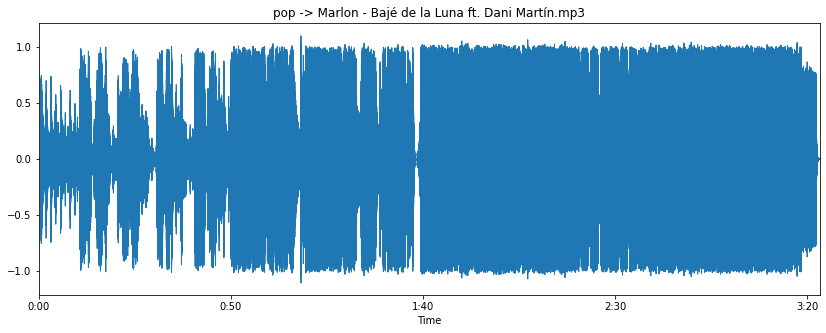

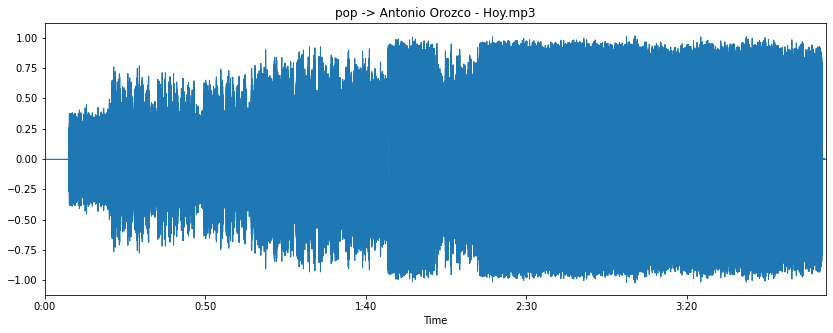

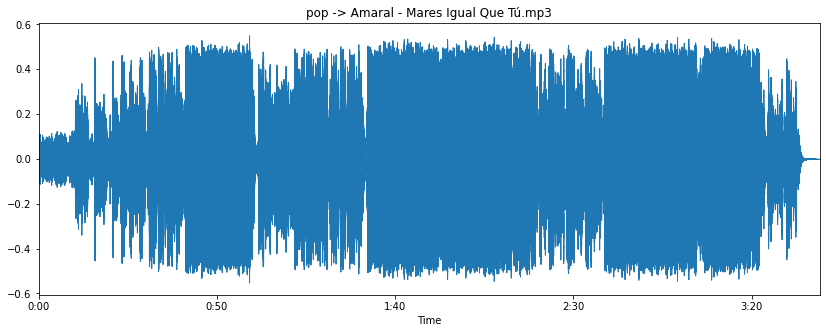

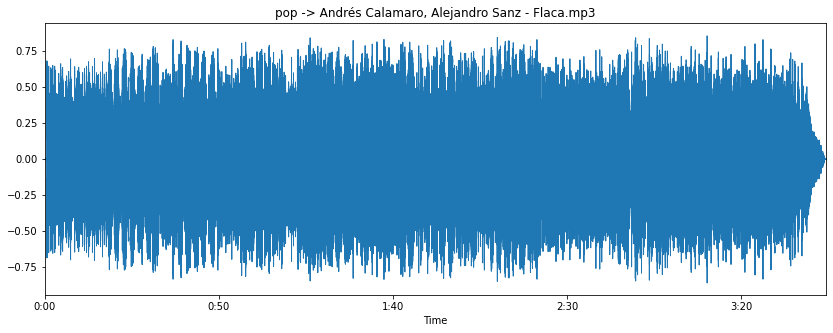

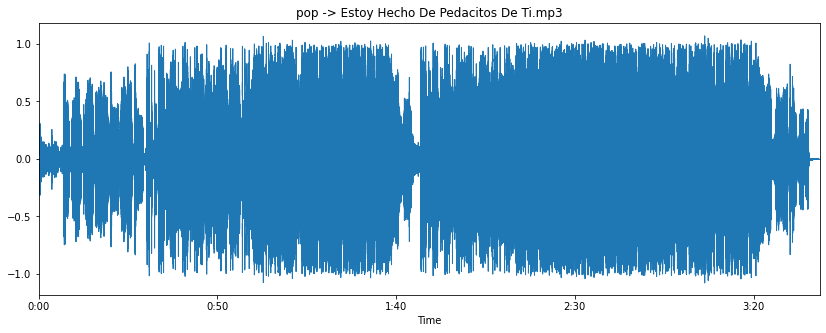

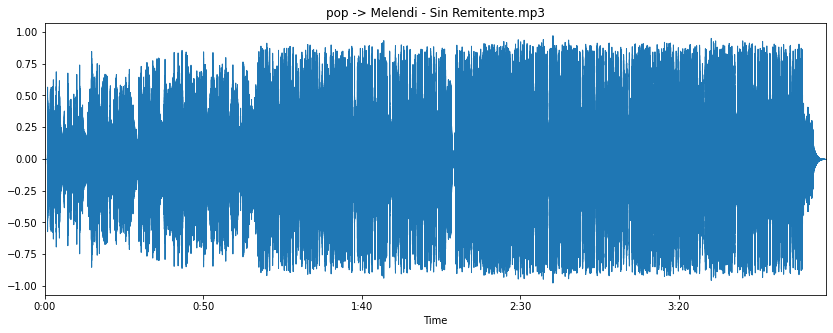

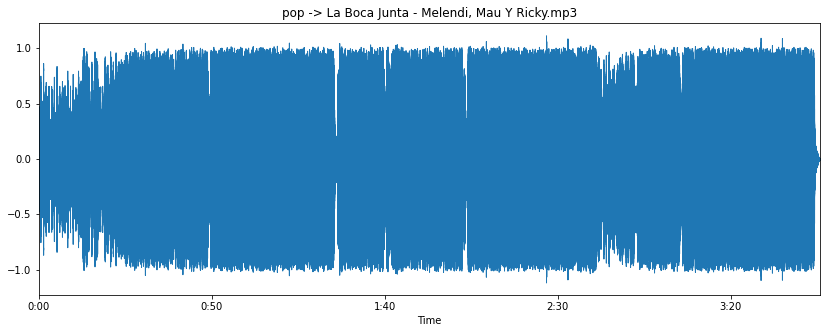

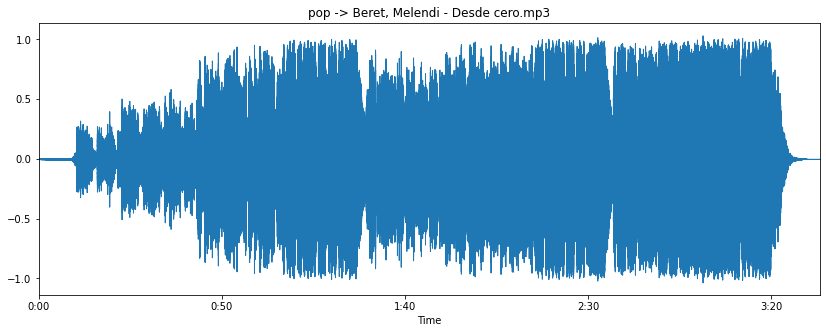

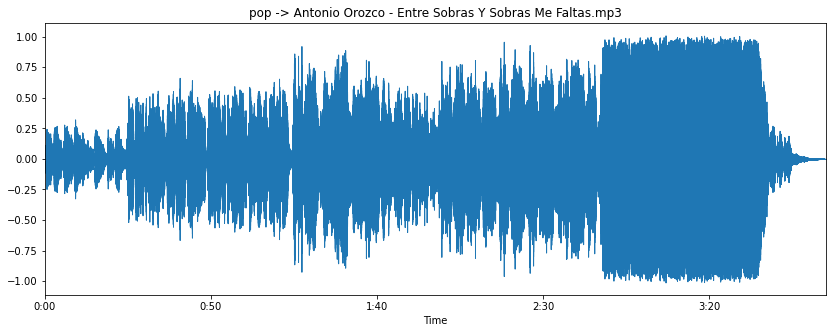

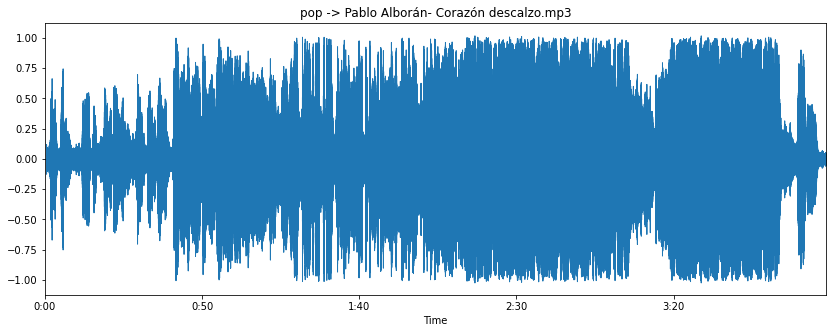

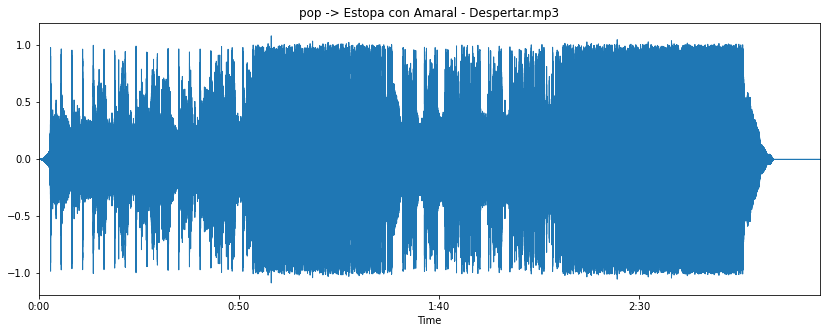

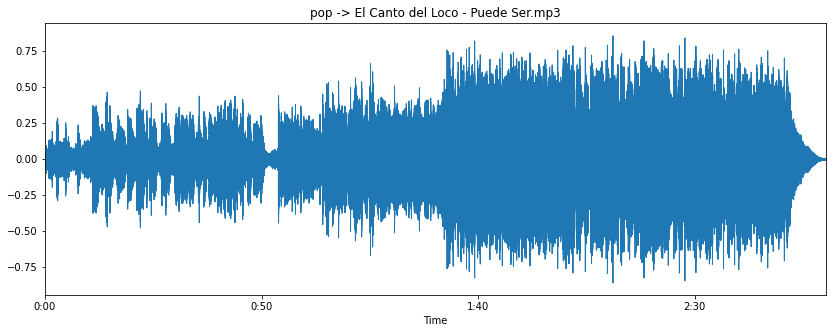

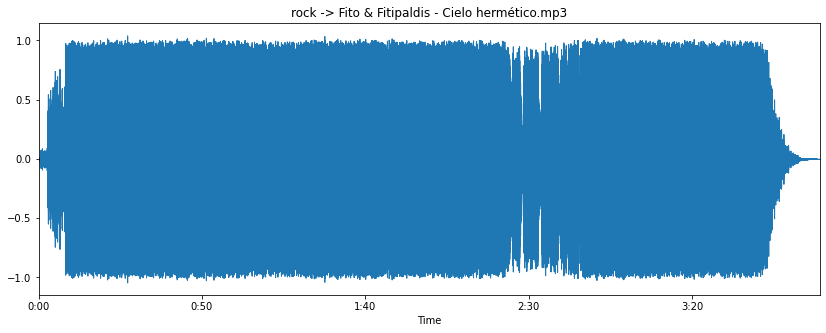

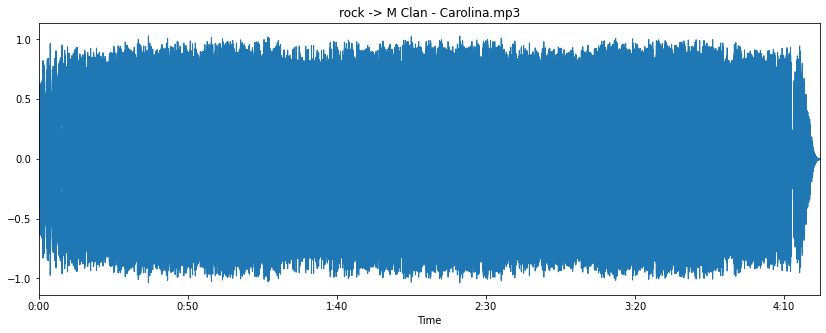

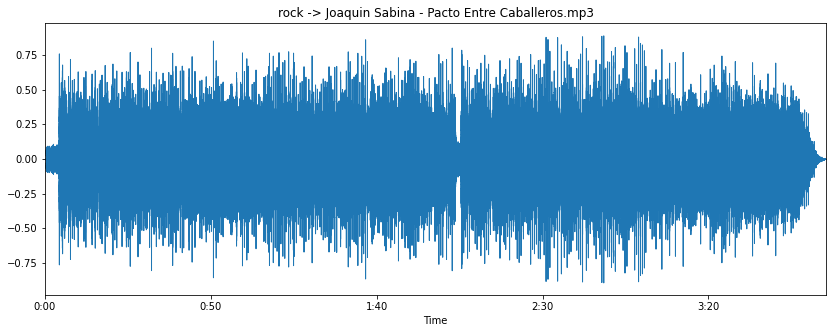

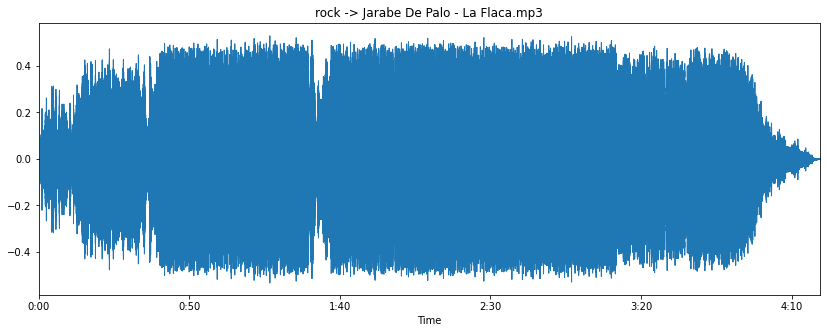

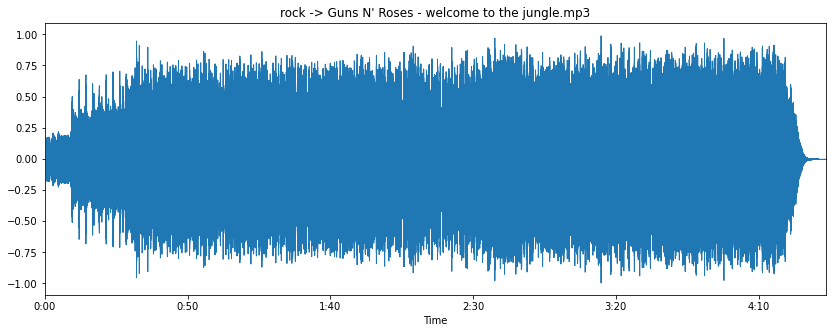

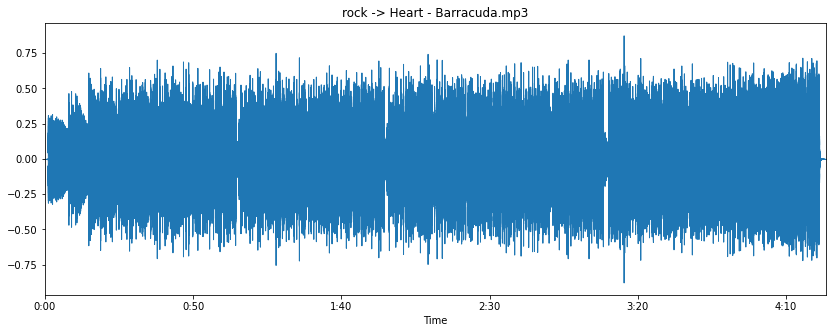

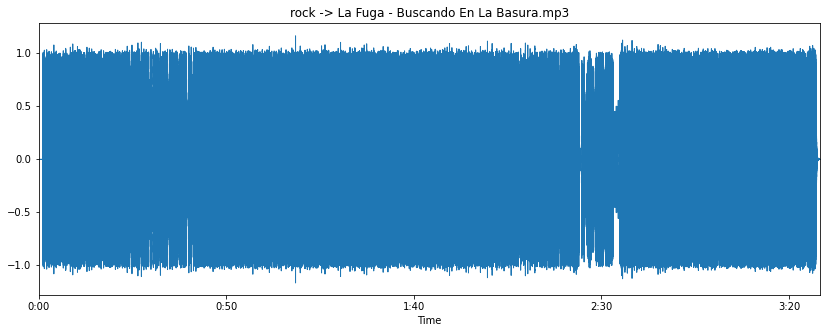

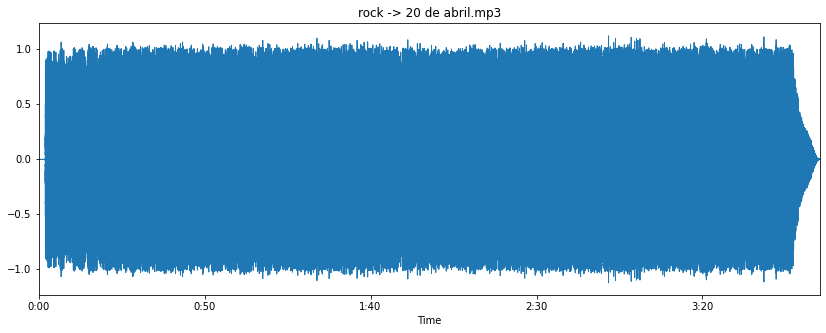

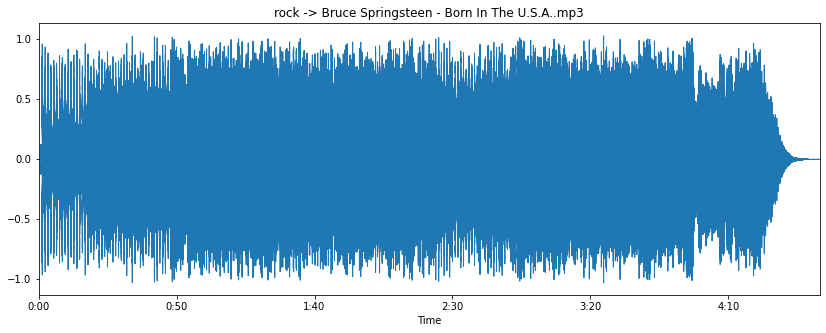

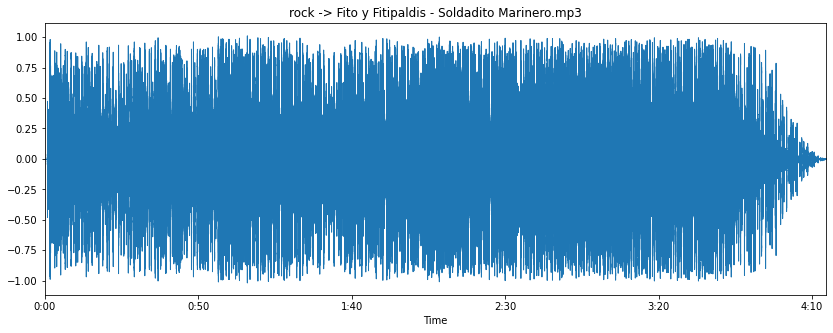

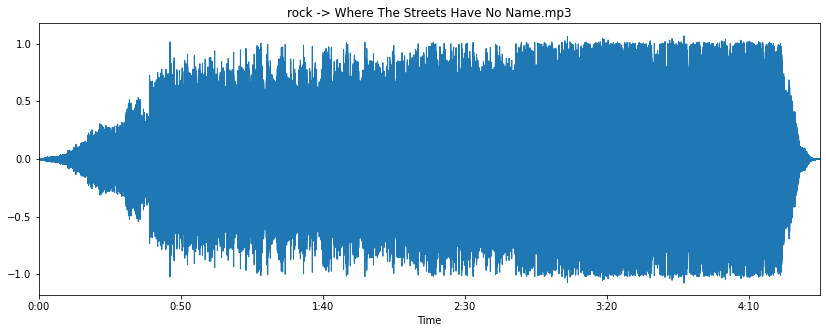

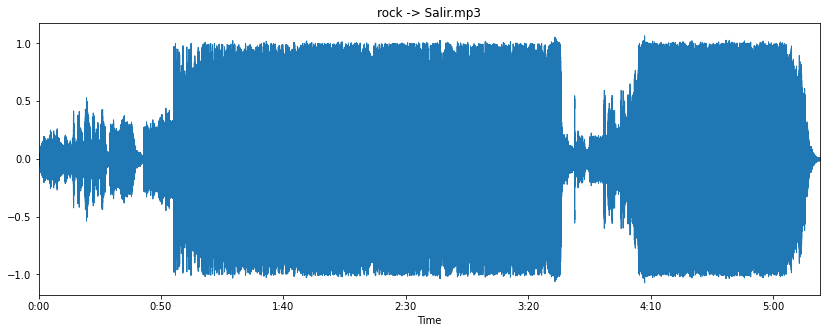

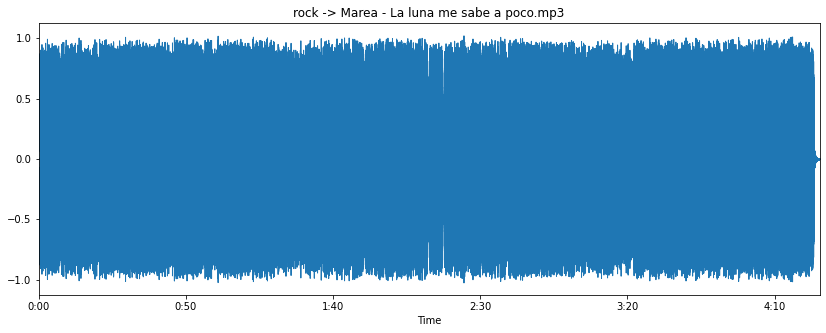

In [5]:
for genero in music_album:
    for name_song in music_album[genero]:
        plt.figure(figsize=(14, 5))
        librosa.display.waveplot(music_album[genero][name_song][0], sr=music_album[genero][name_song][1])
        titulo = genero+" -> "+name_song
        plt.title(titulo)
        plt.show()